# Target
- Understanding about methods for model evaluation.
- Use sklearn library to evaluate models.


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

from sklearn.datasets.base import load_files
from pyvi import ViTokenizer


from sklearn import svm
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.datasets.base import load_files
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score


%matplotlib inline

## Load data:

Structure of the folder: 

- data_sample/news_1135/

    - Sport 
        - news1.txt 
        - news2.txt 
    - Education
        - news3.txt 
        - news4.txt 


Data:
- Documents and their labels.
- Sport label: 
    > "Dân_trí Real Madrid đã dẫn trước trong cả trận đấu , nhưng họ vẫn phải chấp_nhận bị Dortmund cầm hòa 2-2 ở Bernabeu . Real Madrid chấp_nhận đứng thứ_hai ở bảng F Champions League ..."

In [6]:
data_train = load_files(container_path="data/news_1135/", encoding="utf-8")

print(data_train.filenames)
print()

print("The number of files: {}" .format( len(data_train.filenames)))

['data/news_1135/Kinh tế/c3926c2bf603cd4c4474f1e3e21159dc2c732c6d.txt'
 'data/news_1135/Đời sống - Xã hội/52e734aba11ec2a6e25e2be3beb1e9a25992c8be.txt'
 'data/news_1135/Kinh tế/aeadfcd44b05f4adf6641e3f77398525837b333e.txt'
 ...
 'data/news_1135/Thời sự/a12673b7661ec06056b5e20ba7d4c83aebbf6334.txt'
 'data/news_1135/Sức khỏe/43b45beb5f82fa0dcfc228bd78d287a26a251026.txt'
 'data/news_1135/Thể thao/7c4e2c0d15cf600e6b60d4cd195d89ee0eb3e408.txt']

The number of files: 1134


### 1.1 Divide data into 2 parts with a given ratio.

In [7]:
from sklearn.model_selection import ShuffleSplit

# Transforming data 
# Convert text to tf-idf vector 
#     - Remove stop words
#     - Generate the vocab.
module_count_vector = CountVectorizer()
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                    ('tfidf', TfidfTransformer()),
                    ])
# Convert text to matrix
# Input: 2 dimensional numpy.array
#Label: convert text to index. numpy array.
data_preprocessed = model_rf_preprocess.fit_transform(data_train.data, data_train.target)
# print(module_count_vector.vocabulary_)

# Divide data into 2 part by using the function: train_test_split.
test_size = 0.2
# cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
X_train, X_test, y_train, y_test = train_test_split( data_preprocessed, data_train.target, test_size=test_size)


### 1.2 Build and Learn the model 
- Using SVM.

In [8]:
model = svm.SVC(kernel='linear', C=1.0)
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

### 1.3 Evaluate
- Using Accuracy measure.

In [9]:
y_pred = model.predict(X_test)
print("- Acc = {}".format(accuracy_score(y_test, y_pred)))

- Acc = 0.8854625550660793


# 2. Use cross-validation to evaluate models.

## Plot learning curver 

- Write the function to train with cross-validation.
- Use libs to train and select ratios of data, then write log of values.
- Use matlibplot to draw learning curver.

In [14]:
# Function to generate different colors for ids.  
def get_cmap(n):
    return 'C' + str(n)

# Funtion to train the model, cross-validation and draw with matplotlib. 
def plot_learning_curve(estimator, title, label_curve, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5), new_plot=False,
                        idx_color=0):
    
    # Make a new image: 
    if new_plot:
        # plt.figure()
        plt.title(title)
        plt.xlabel("Training examples")
        plt.ylabel("Accuracy")
        plt.grid()
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    # Train the model and save some values while training. 
    # cv = the number of folds, one fold will be selected to test in training phase 
    # and the others will be used for training.
    # train_sizes = ratio array, 
    #  train_sizes = [0.3, 0.5] means case 1 with 0.3: 0.3 for training and 0.7 for testing.
    # case 2 with 0.5 means 0.5 for training and 0.5 for validating.
    # scoring = objective function to evaluate the quality of models. 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="accuracy")
    

    # Get the average of all output of folds.
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    # Select a color.
    color = get_cmap(idx_color)
    
    # Draw
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color=color)
    plt.plot(train_sizes, test_scores_mean, 'o-', color=color,
             label=label_curve)

    plt.legend(loc="best")
    return plt


## Convert text to matrix


In [15]:
module_count_vector = CountVectorizer()
model_rf_preprocess = Pipeline([('vect', module_count_vector),
                    ('tfidf', TfidfTransformer()),
                    ])

data_preprocessed = model_rf_preprocess.fit_transform(data_train.data, data_train.target)


## Experiment with different parameters.

- For each model: random forest, svm, ... selecting parameters is different. 

## Change the number of trees for Random Forest model.


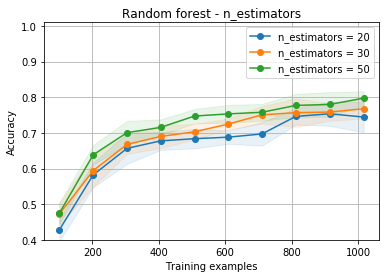

In [18]:
title = "Random forest - n_estimators"

for i, n_estimators in enumerate([20, 30, 50]):
    #With each estimator, we will build and learn the corresponding model.
    text_clf =  RandomForestClassifier(criterion='gini', n_estimators=n_estimators)
    plt = plot_learning_curve(text_clf, title, "n_estimators = {}".format(n_estimators),
                              data_preprocessed, data_train.target,
                              (0.4, 1.01),
                              train_sizes=np.linspace(.1, 1.0, 10),
                              cv=10, n_jobs=-1, idx_color=i, new_plot=i == 0)
# Save image 
plt.savefig('images/RandomForestcriterion.png', bbox_inches='tight')
plt.show()

## Comparision of best models


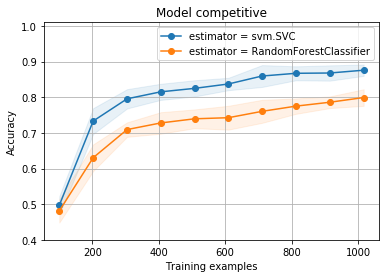

In [19]:
title = "Model comparison"

best_models = [
    svm.SVC(kernel='linear', C=1.0),
    RandomForestClassifier(criterion='gini', n_estimators=50)
]
best_models_name = [
    'svm.SVC',
    'RandomForestClassifier'
]

for i, estimator in enumerate(best_models):
    
    text_clf = Pipeline([
                         ('clf', estimator),
                         ])
    plt = plot_learning_curve(text_clf, title, "estimator = {}".format(best_models_name[i]),
                              data_preprocessed, data_train.target,
                              (0.4, 1.01),
                              train_sizes=np.linspace(.1, 1.0, 10),
                              cv=10, n_jobs=-1, idx_color=i, new_plot=i == 0)
# Save the image 
plt.savefig('images/Model_comparison.png', bbox_inches='tight')
plt.show()